# Importing all necessary libraries

In [38]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import warnings

%matplotlib inline

## Load Data

In [39]:
df_pdf = pd.read_csv('PDFMalware2022.csv')

# Display first 5 Rows.
df_pdf.head()

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,...,0,1,0,0,0,0,0,0,0.0,Malicious


## Get a brief summary for our PDF dataset.

In [40]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine name         10026 non-null  object 
 1   pdfsize           10025 non-null  float64
 2   metadata size     10025 non-null  float64
 3   pages             10025 non-null  float64
 4   xref Length       10025 non-null  float64
 5   title characters  10025 non-null  float64
 6   isEncrypted       10025 non-null  float64
 7   embedded files    10025 non-null  float64
 8   images            10025 non-null  object 
 9   text              10025 non-null  object 
 10  header            10025 non-null  object 
 11  obj               10023 non-null  object 
 12  endobj            10023 non-null  object 
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  object 
 15  xref              10023 non-null  object 
 16  trailer           10023 non-null  float6

In [41]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(10026, 33)

## Check data types for our dataset

In [42]:

df_pdf.dtypes.value_counts()


object     21
float64    12
Name: count, dtype: int64

In [43]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,stream,trailer,encrypt,ObjStm,Colors
count,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10025.000000,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000
mean,87.209476,334.099352,3.398105,2739.220549,51.477207,-0.020848,-0.006484,17.341215,1.203532,-0.043500,1.516811,2.087000
std,444.197122,1565.853177,11.902471,18139.229396,1354.640037,0.206789,0.257098,35.330169,1.370455,0.256045,7.633485,58.178074
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,180.000000,1.000000,12.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,36.000000,265.000000,1.000000,21.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000
75%,80.000000,319.000000,2.000000,77.000000,13.000000,0.000000,0.000000,18.000000,2.000000,0.000000,0.000000,0.000000
max,23816.000000,77185.000000,595.000000,263987.000000,76993.000000,4.000000,5.000000,812.000000,46.000000,2.000000,600.000000,5682.000000


## Check total Missing values.

In [44]:

sum(df_pdf.isnull().sum())


74

In [45]:
# Check Missing values for each column
df_pdf.isnull().sum()

Fine name           0
pdfsize             1
metadata size       1
pages               1
xref Length         1
title characters    1
isEncrypted         1
embedded files      1
images              1
text                1
header              1
obj                 3
endobj              3
stream              3
endstream           3
xref                3
trailer             3
startxref           3
pageno              3
encrypt             3
ObjStm              3
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              3
Class               1
dtype: int64

In [46]:
# Display Missing values for specific column
df_pdf[df_pdf.Class.isnull()]

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
1339,3329abf72745a8483b96f60d48774177d2ca3f8ec37316...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
1339,3329abf72745a8483b96f60d48774177d2ca3f8ec37316...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,a4c1e7dbcf95e3b9fae8ea506e770fa051d475a2cac962...,12.0,180.0,1.0,9.0,0.0,0.0,0.0,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious
2157,604f49700028d231aba380dce780a5f600e373f7fab406...,1.0,180.0,1.0,111612.0,0.0,0.0,0.0,0,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malicious


## Visualize Bar chart of missing values

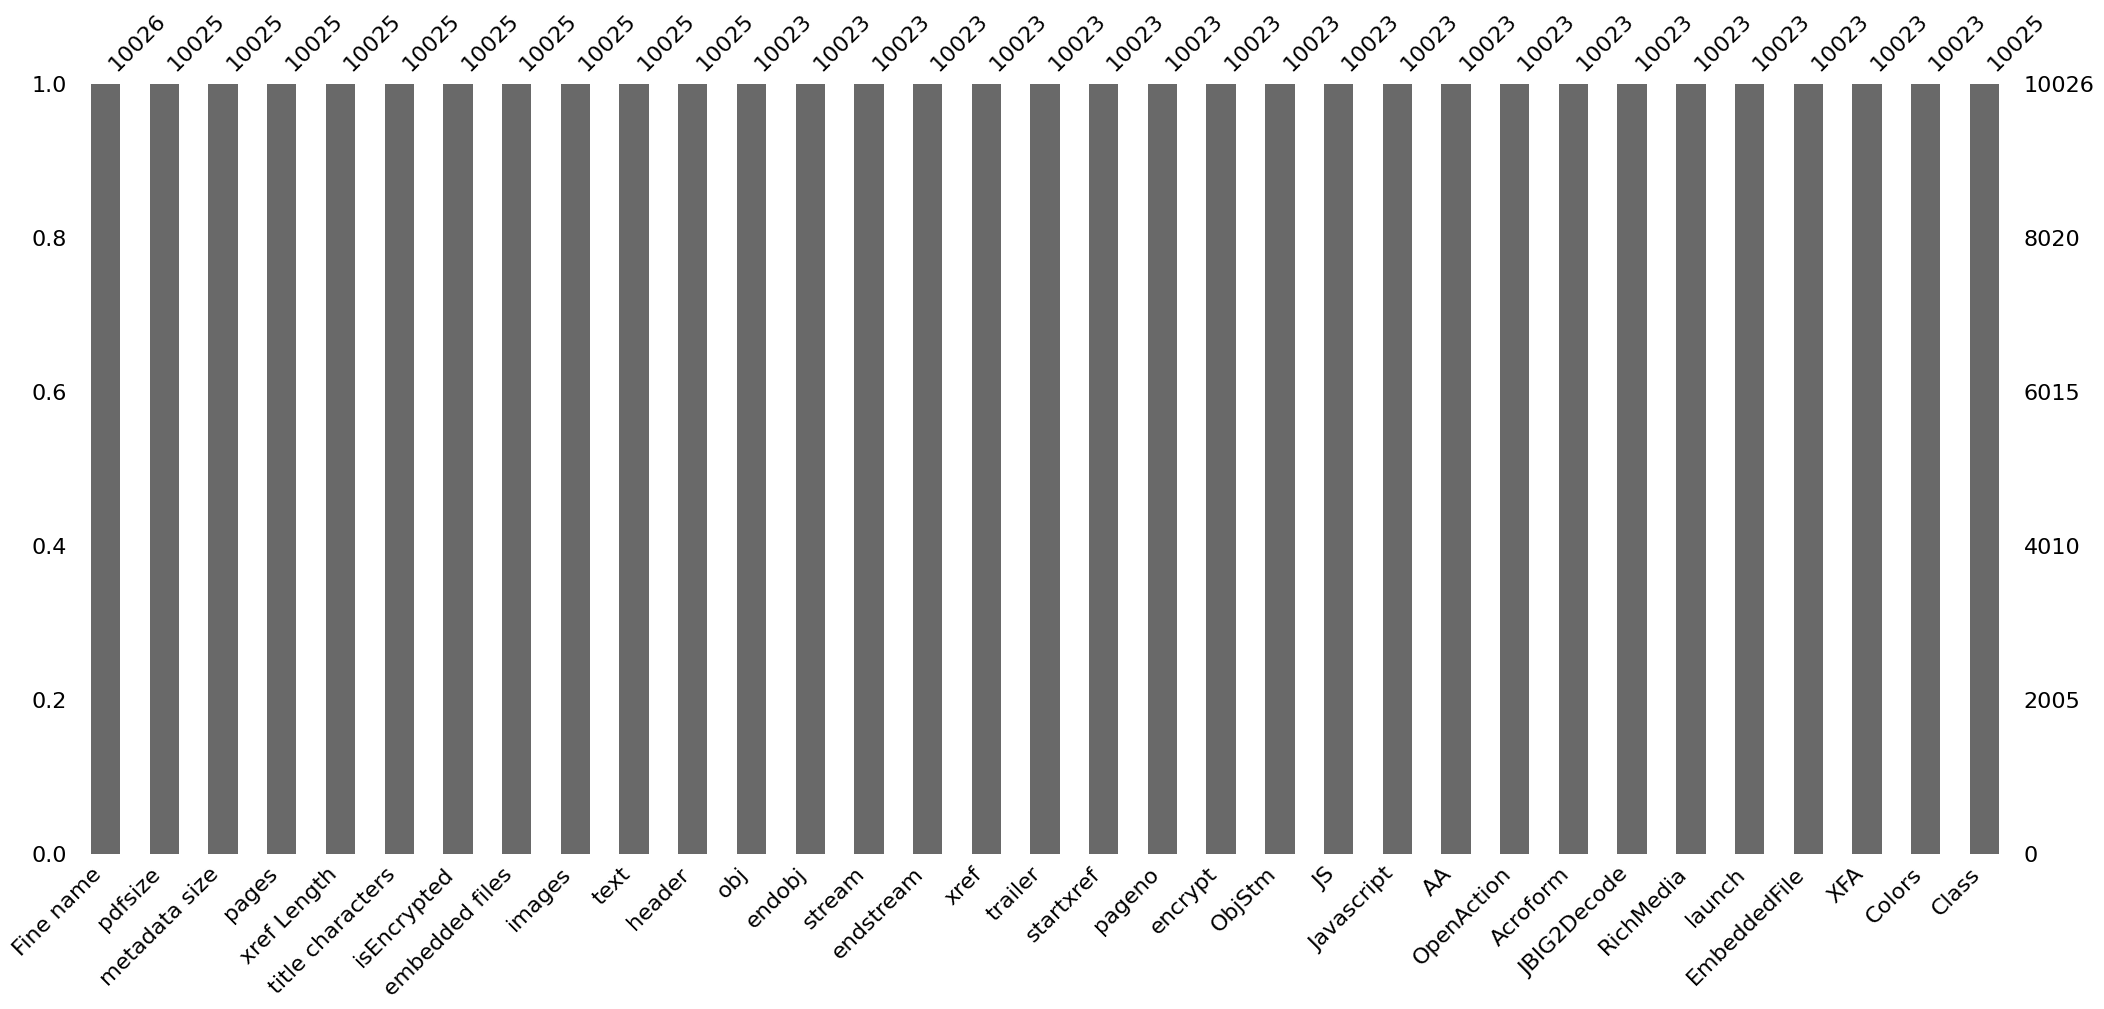

In [48]:

msno.bar(df_pdf);

In [49]:
# store numerical columns to variable
numeric_columns = [x for x in df_pdf.columns if df_pdf[x].dtype != 'object'] # output 12 numerical variables

# identify Imputer
mice_imputer = IterativeImputer()

# Apply imputation
df_pdf[numeric_columns] = mice_imputer.fit_transform(df_pdf[numeric_columns])

In [50]:
# Check missing after applied imputation
df_pdf.isnull().sum()


Fine name           0
pdfsize             0
metadata size       0
pages               0
xref Length         0
title characters    0
isEncrypted         0
embedded files      0
images              1
text                1
header              1
obj                 3
endobj              3
stream              0
endstream           3
xref                3
trailer             0
startxref           3
pageno              3
encrypt             0
ObjStm              0
JS                  3
Javascript          3
AA                  3
OpenAction          3
Acroform            3
JBIG2Decode         3
RichMedia           3
launch              3
EmbeddedFile        3
XFA                 3
Colors              0
Class               1
dtype: int64

In [51]:
sum(df_pdf.isnull().sum())

52

In [52]:
# Drop Fine Name for now..
df_pdf.drop('Fine name', axis = 1, inplace= True)

# store categorical columns to independed vaiable
categorical_columns = [x for x in df_pdf.columns if df_pdf[x].dtype == 'object'] # output 20

# Check values of each categorical column that have missing value/s
for i in categorical_columns:
    print('Number of unique values for *{}*'.format(i), df_pdf[i].nunique())

Number of unique values for *images* 89
Number of unique values for *text* 5
Number of unique values for *header* 50
Number of unique values for *obj* 479
Number of unique values for *endobj* 478
Number of unique values for *endstream* 241
Number of unique values for *xref* 21
Number of unique values for *startxref* 20
Number of unique values for *pageno* 96
Number of unique values for *JS* 32
Number of unique values for *Javascript* 35
Number of unique values for *AA* 40
Number of unique values for *OpenAction* 8
Number of unique values for *Acroform* 10
Number of unique values for *JBIG2Decode* 16
Number of unique values for *RichMedia* 7
Number of unique values for *launch* 5
Number of unique values for *EmbeddedFile* 19
Number of unique values for *XFA* 7
Number of unique values for *Class* 2


In [53]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value
        in column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        print(self)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

 # Apply miputation Function
df_pdf[categorical_columns] = DataFrameImputer().fit_transform(df_pdf[categorical_columns])

In [54]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  object 
 8   text              10026 non-null  object 
 9   header            10026 non-null  object 
 10  obj               10026 non-null  object 
 11  endobj            10026 non-null  object 
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  object 
 14  xref              10026 non-null  object 
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  object

In [55]:
# Check duplicate points in our dataset
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(0)

In [56]:
# Check number of samples for each class [Benign, Malicious]
df_pdf.Class.value_counts()


Class
Malicious    5558
Benign       4468
Name: count, dtype: int64

In [57]:
data = df_pdf
data.head()


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,Malicious
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,Malicious
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,Malicious


## result and text mapping

In [58]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 31] = data.iloc[:, 31].map({'Malicious': 1, 'Benign': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,0,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,0,\t%PDF-1.6,...,0,0,1,0,0,0,8,1,0.0,1
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,1,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,0,\t%PDF-1.3,...,0,1,1,0,0,0,0,0,0.0,1
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,1,\t%PDF-1.3,...,0,1,0,0,0,0,0,0,0.0,1


## Converting header values (text to float)

In [59]:
original_values = np.array(['\t%PDF-1.3', '\t%PDF-1.6', '\t%PDF-1.5', '\t%PDF-1.4',
                            '\t%PDF-\\x07.3', '\t%PDF-1.0', '\t%PDF-1.7', '\t%PDF-1.1',
                            '\t%PDF-1.6%â', '\t%PDF-1.', '\t%PDF-1.3%ï', '\t%PDF-1.2',
                            '\t%PDF-aaa', '\t%PDF-11311', '\t2]', '\ta', '\t%PDF-11113',
                            '\t%PDF-1.544', '\t%PDF-1.344', '\t%PDF-13131', '\t%PDF-\\x00.4',
                            '\t%PDF-0.9', '\t%PDF-2.4', '\t%PDF-1.8', '\t%PDF-1.6"',
                            '\t%PDF-\\\\\\\\x07', '\t%PDF-1.1"', '\t%PDF-1.3"', '\t%PDF-1.5"',
                            '\t%PDF-1.4"', '\toccured*', '\t%PDF-1.0"', '\t%PDF-1.7"',
                            '\t%PDF-1.4\\\\n', '\t%PDF-1.3\\\\n', '\t%PDF-2.4"', '\t%PDF-1."',
                            '\t%PDF-1.2"', '\t%PDF-1.0\\\\n', '\t%PDF-aaa"', '1', '0',
                            '\t/bin/sh: 1: _Cunningham_Studio.pdf: not found',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger',
                            "\t[Errno 2] No such file or directory: '/mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Albert_Berger",
                            '\t/bin/sh: 1: Syntax error: "(" unexpected',
                            '\t/bin/sh: 1: Syntax error: Unterminated quoted string', '\tyour',
                            '-1',
                            '\tError opening file /mnt/hgfs/kali_stuff/CLEAN_PDF_9000_files/Inheritances'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

## Converting objects to numeric values

In [60]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0.0,0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,1
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0.0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0.0,0,10.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0.0,1,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [61]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  float64
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

## Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns

In [62]:

X = data.drop(columns=[ data.columns[31]])  # Adjusted indices
y = data.iloc[:, 31]
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   isEncrypted       10026 non-null  float64
 6   embedded files    10026 non-null  float64
 7   images            10026 non-null  float64
 8   text              10026 non-null  int64  
 9   header            10026 non-null  float64
 10  obj               10026 non-null  float64
 11  endobj            10026 non-null  float64
 12  stream            10026 non-null  float64
 13  endstream         10026 non-null  float64
 14  xref              10026 non-null  float64
 15  trailer           10026 non-null  float64
 16  startxref         10026 non-null  float6

In [63]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# AdaBoost

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


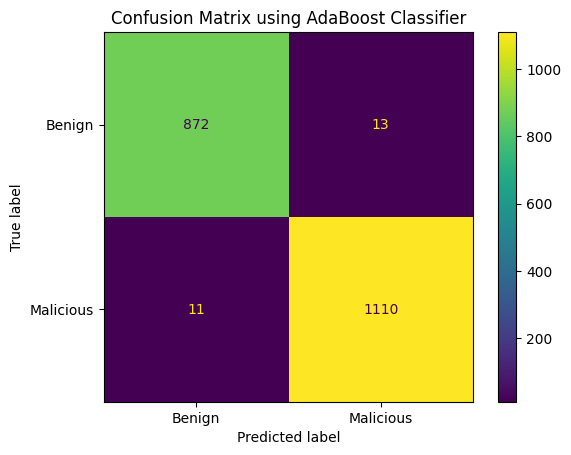

False Positive Rate: 0.014689265536723164
True Positive Rate: 0.9901873327386262
Accuracy Score: 0.9880358923230309


In [64]:
# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier()

# Train the model
ada_boost.fit(X_train, y_train)

# Make Predictions
y_pred_ab = ada_boost.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ab).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ab), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_ab)}')


# **RandomForest**

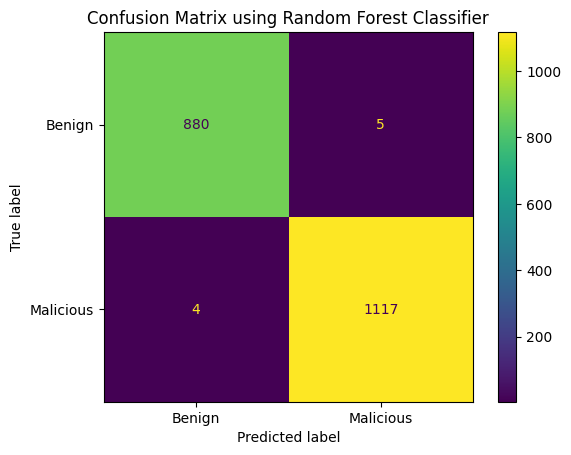

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9964317573595004
Accuracy Score: 0.9955134596211366


In [65]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

## Feature Importance Chart

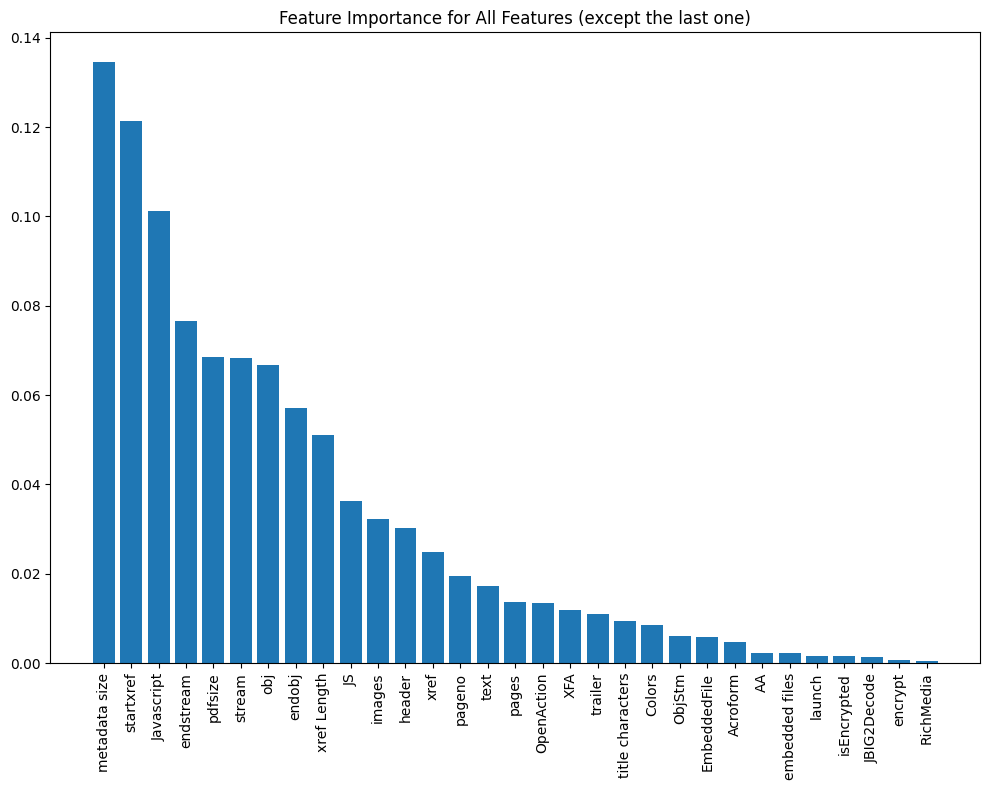

In [66]:
# Assuming your dataset is in 'df'

# Separate features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf = RandomForestClassifier()
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



## Removing last few columns in Bar Chart above

In [67]:
X1 = data.drop(columns=[data.columns[6],data.columns[5],data.columns[22],data.columns[27],data.columns[25],data.columns[18],data.columns[26], data.columns[31]])  # Adjusted indices
y1 = data.iloc[:, 31]
X1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10026 entries, 0 to 10025
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           10026 non-null  float64
 1   metadata size     10026 non-null  float64
 2   pages             10026 non-null  float64
 3   xref Length       10026 non-null  float64
 4   title characters  10026 non-null  float64
 5   images            10026 non-null  float64
 6   text              10026 non-null  int64  
 7   header            10026 non-null  float64
 8   obj               10026 non-null  float64
 9   endobj            10026 non-null  float64
 10  stream            10026 non-null  float64
 11  endstream         10026 non-null  float64
 12  xref              10026 non-null  float64
 13  trailer           10026 non-null  float64
 14  startxref         10026 non-null  float64
 15  pageno            10026 non-null  float64
 16  ObjStm            10026 non-null  float6

In [68]:
# Ensure y is aligned with X
y1 = y1.iloc[:X1.shape[0]]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)



## Re-run RandomForest

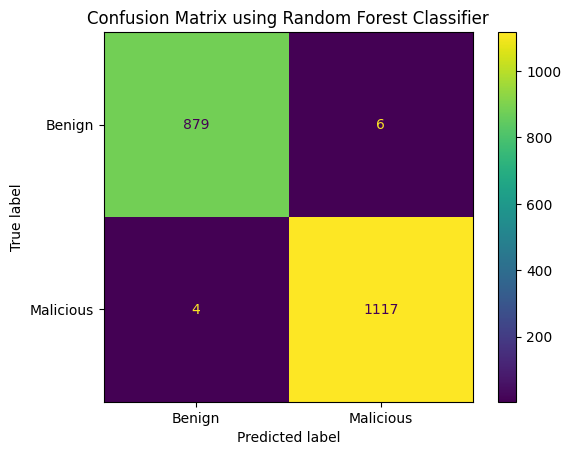

False Positive Rate: 0.006779661016949152
True Positive Rate: 0.9964317573595004
Accuracy Score: 0.9950149551345963


In [69]:
# Initialize Random Forest Classifier
rf1 = RandomForestClassifier()

# Train the model
rf1.fit(X_train1, y_train1)

# Make Predictions
y_pred_rf1 = rf1.predict(X_test1)

# Confusion Matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, y_pred_rf1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_rf1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp1 / (fp1 + tn1)}')
print(f'True Positive Rate: {tp1 / (tp1 + fn1)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_rf1)}')

## Feature Importance Chart

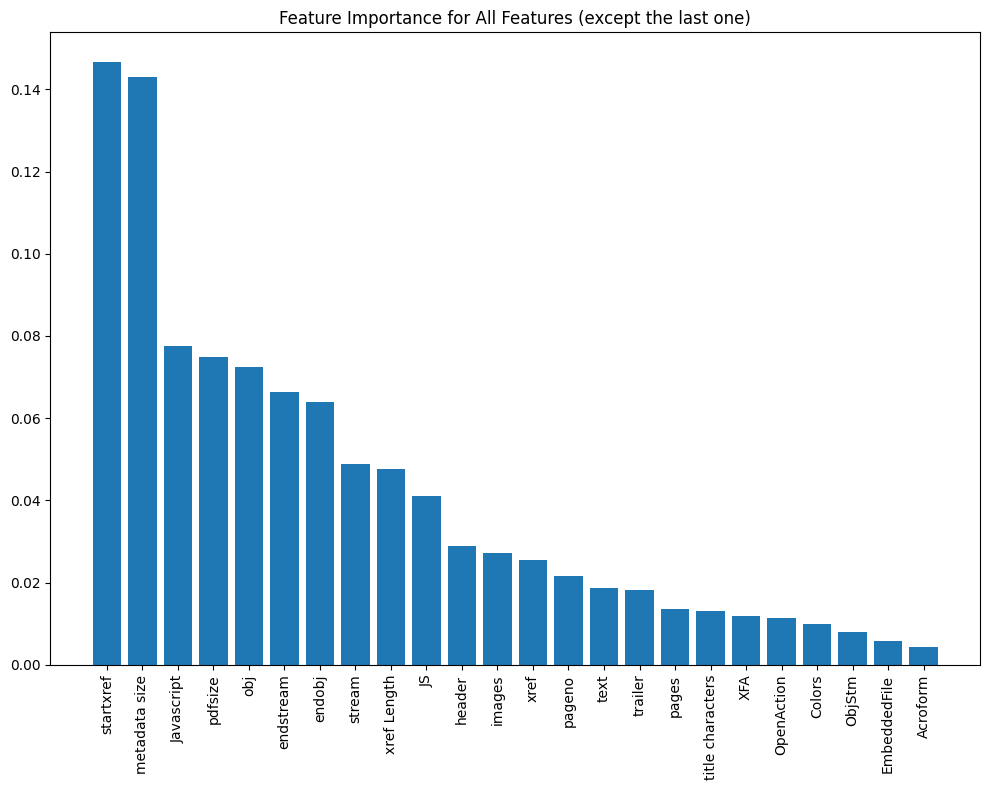

In [70]:
# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = X1.columns[:]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier()
rf1.fit(X1, y1)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# **ADABoost Re-run**

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


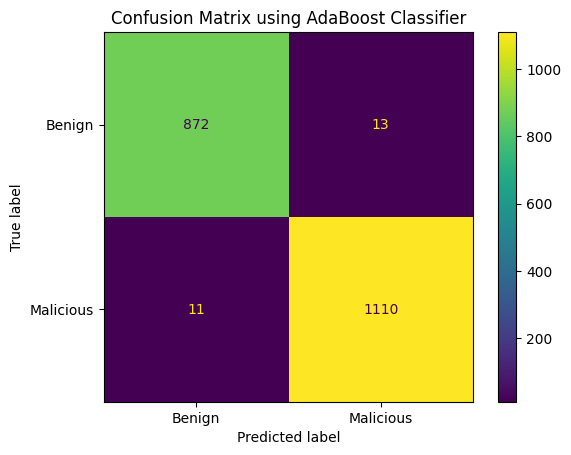

False Positive Rate: 0.014689265536723164
True Positive Rate: 0.9901873327386262
Accuracy Score: 0.9880358923230309


In [71]:
# Initialize AdaBoost Classifier
ada_boost1 = AdaBoostClassifier()

# Train the model
ada_boost1.fit(X_train1, y_train1)

# Make Predictions
y_pred_ab1 = ada_boost1.predict(X_test1)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred_ab1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_ab1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_ab1)}')


# **MLP**

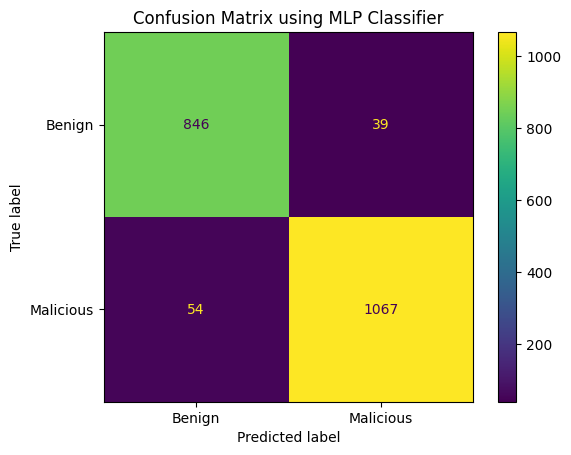

False Positive Rate: 0.04406779661016949
True Positive Rate: 0.951828724353256
Accuracy Score: 0.9536390827517448


In [72]:
# Initialize MLP Classifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Make Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using MLP Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_mlp)}')


# SVM

Test accuracy: 0.9661


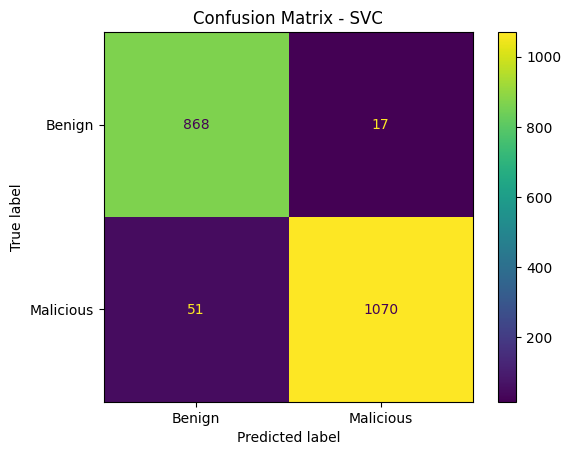

False Positive Rate: 0.0192090395480226
True Positive Rate: 0.9545049063336307


In [73]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC()

# Train the model
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Create confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot()
plt.title('Confusion Matrix - SVC')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')

# MLP, RandomForest and SVM as Base learner

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-pa

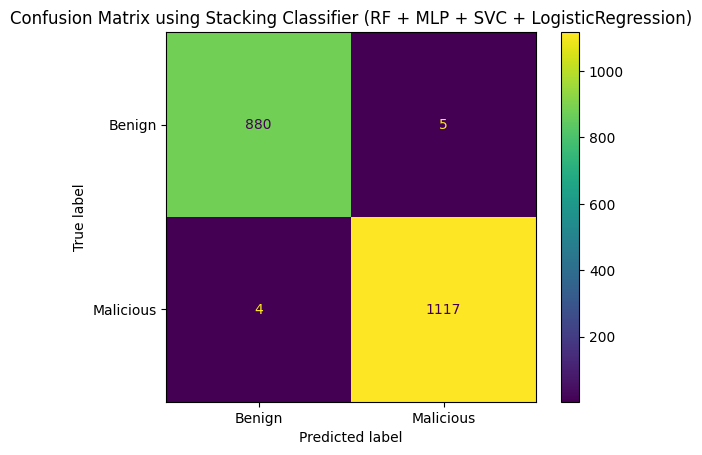

False Positive Rate: 0.005649717514124294
True Positive Rate: 0.9964317573595004
Accuracy Score: 0.9955134596211366


In [74]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize Random Forest Classifier as one of the base models
rf_base = RandomForestClassifier()

# Initialize MLP Classifier as another base model
mlp_base = MLPClassifier()

# Initialize SVM as another base model
svc_base = SVC()

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression()

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Stacking Classifier using RandomForest, MLP, and SVC as base models and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_base),  # Random Forest base model
        ('mlp', mlp_base),  # MLP base model
        ('svc', svc_base)  # SVM base model
    ],
    final_estimator=logistic_meta  # Meta learner (LogisticRegression)
)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + SVC + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


In [75]:
df_pdf1 = pd.read_csv('MalwareBazaar.csv')

# Display first 5 Rows.
df_pdf1.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
0,60f228439ac915353c10f57124260adc,62,288,2,59,0,0,0,0,Yes,...,7,0,10,1,1,1,0,59,60,57
1,c82288e91b9b0985909d14ed5337c643,192,314,1,136,8,0,0,0,Yes,...,3,0,0,0,0,4,3,53,60,303
2,277a3e91da0bae5c70f1b4b5d7278eab,32,290,1,8,0,0,0,0,No,...,2,0,0,1,1,1,0,11,12,47
3,c8fef6aa70e440b6762dbc78bba8162b,0,275,1,7,19,0,0,0,No,...,0,0,0,0,1,1,0,7,7,2
4,8ac7ebad74f41b0f38ffd7b2a85dd411,59,212,1,13,0,0,0,0,Yes,...,2,0,0,1,0,1,0,17,18,87


In [76]:
df_pdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MD5                      526 non-null    object
 1   pdfsize                  526 non-null    int64 
 2   metadata size            526 non-null    int64 
 3   pages                    526 non-null    int64 
 4   xref length              526 non-null    int64 
 5   title characters         526 non-null    int64 
 6   isEncrypted              526 non-null    int64 
 7   embedded files           526 non-null    int64 
 8   images                   526 non-null    int64 
 9   contains text            526 non-null    object
 10  header                   526 non-null    object
 11  obj                      526 non-null    int64 
 12  endobj                   526 non-null    int64 
 13  stream                   526 non-null    int64 
 14  endstream                526 non-null    i

In [77]:
sum(df_pdf1.isnull().sum())

0

In [78]:
df_pdf1.drop('MD5', axis = 1, inplace= True)

In [79]:
df_pdf1.duplicated().sum()

np.int64(31)

In [80]:
df_pdf1 = df_pdf1.drop_duplicates()

In [81]:
df_pdf1.duplicated().sum()

np.int64(0)

In [82]:
data1 = df_pdf1.copy()
data1.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,7,0,10,1,1,1,0,59,60,57
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,3,0,0,0,0,4,3,53,60,303
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,2,0,0,1,1,1,0,11,12,47
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,0,1,1,0,7,7,2
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,2,0,0,1,0,1,0,17,18,87


In [83]:
data1 = data1.drop(columns=[col for col in data1.columns if col.endswith('_Obfuscated')])
data1.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
0,62,288,2,59,0,0,0,0,Yes,%PDF-1.4,...,7,0,10,1,1,1,0,59,60,57
1,192,314,1,136,8,0,0,0,Yes,%PDF-1.7,...,3,0,0,0,0,4,3,53,60,303
2,32,290,1,8,0,0,0,0,No,%PDF-1.4,...,2,0,0,1,1,1,0,11,12,47
3,0,275,1,7,19,0,0,0,No,%PDF-1.7,...,0,0,0,0,1,1,0,7,7,2
4,59,212,1,13,0,0,0,0,Yes,%PDF-1.3,...,2,0,0,1,0,1,0,17,18,87


In [84]:
data1.iloc[:, 8] = data1.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data1.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
0,62,288,2,59,0,0,0,0,1,%PDF-1.4,...,7,0,10,1,1,1,0,59,60,57
1,192,314,1,136,8,0,0,0,1,%PDF-1.7,...,3,0,0,0,0,4,3,53,60,303
2,32,290,1,8,0,0,0,0,0,%PDF-1.4,...,2,0,0,1,1,1,0,11,12,47
3,0,275,1,7,19,0,0,0,0,%PDF-1.7,...,0,0,0,0,1,1,0,7,7,2
4,59,212,1,13,0,0,0,0,1,%PDF-1.3,...,2,0,0,1,0,1,0,17,18,87


In [85]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data1.iloc[:,9] = df_pdf1.iloc[:,9].map(value_mapping)

In [86]:
data1 = data1.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data1.fillna(0, inplace=True)  #


data1.head() # Ensure data is loaded correctly

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
0,62,288,2,59,0,0,0,0,1,4.0,...,7,0,10,1,1,1,0,59,60,57
1,192,314,1,136,8,0,0,0,1,7.0,...,3,0,0,0,0,4,3,53,60,303
2,32,290,1,8,0,0,0,0,0,4.0,...,2,0,0,1,1,1,0,11,12,47
3,0,275,1,7,19,0,0,0,0,7.0,...,0,0,0,0,1,1,0,7,7,2
4,59,212,1,13,0,0,0,0,1,3.0,...,2,0,0,1,0,1,0,17,18,87


In [87]:

X = data1.drop(data1.columns[31:49], axis=1)


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 525
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pdfsize           495 non-null    int64  
 1   metadata size     495 non-null    int64  
 2   pages             495 non-null    int64  
 3   xref length       495 non-null    int64  
 4   title characters  495 non-null    int64  
 5   isEncrypted       495 non-null    int64  
 6   embedded files    495 non-null    int64  
 7   images            495 non-null    int64  
 8   contains text     495 non-null    int64  
 9   header            495 non-null    float64
 10  obj               495 non-null    int64  
 11  endobj            495 non-null    int64  
 12  stream            495 non-null    int64  
 13  endstream         495 non-null    int64  
 14  xref              495 non-null    int64  
 15  trailer           495 non-null    int64  
 16  startxref         495 non-null    int64  
 17  pa

In [89]:
y = np.ones((495, 1))

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_1 = scaler.transform(X)

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


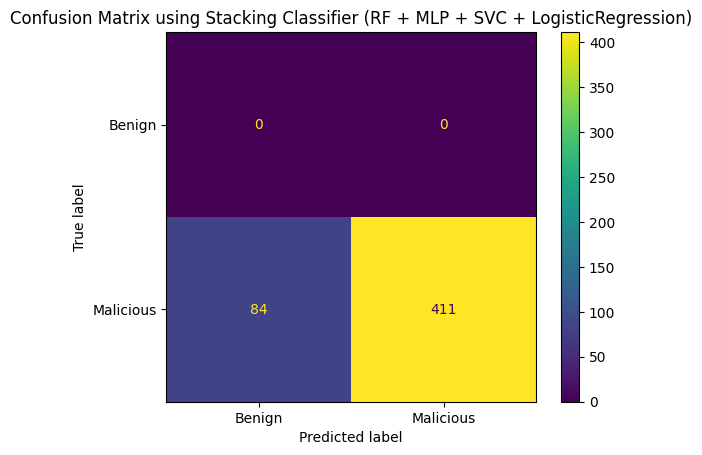

False Positive Rate: nan
True Positive Rate: 0.8303030303030303
Accuracy Score: 0.8303030303030303
Precision: 1.0
Recall: 0.8303030303030303
F1 Score: 0.9072847682119205


C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_3060\2224498178.py:21: RuntimeWarning: invalid value encountered in scalar divide
  print(f'False Positive Rate: {fp / (fp + tn)}')


In [93]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score
)

# Make predictions
y_pred_stacking = stacking_model.predict(X_1)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + SVC + LogisticRegression)')
plt.show()

# Calculate and print performance metrics
accuracy = accuracy_score(y, y_pred_stacking)
precision = precision_score(y, y_pred_stacking)
recall = recall_score(y, y_pred_stacking)
f1 = f1_score(y, y_pred_stacking)

print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
